## Workshop: Making Decision with statistics and hypothesis testing (Shopno Supershop fake data)

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
np.random.seed(42)
n = 10000 #number of records
regions =['Dhaka','Chattogram','Rajshahi','Khulna','Sylhet','Barisal','Rangpur','Mymensingh']
sales_channels = ['Online','Offline']
products = ['Electronics','Clothing','Groceries','Books','Home Appliances','Health and Beauty']

# Create random date in 2025
def random_dates_2025(n):
  start_date = datetime(2025, 1, 1)
  end_date = datetime(2025, 12, 31)
  return [start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days)) for _ in range(n)]

#create dataFrame
df = pd.DataFrame({
      'Transaction_ID': ['TXN' + str(i).zfill(6) for i in range(1,n+1)],
      'Customer_ID':range(1,n+1),
      'Date': random_dates_2025(n),
      'Region': np.random.choice(regions, n),
      'Sales_Channel': np.random.choice(sales_channels, n,p=[0.6,0.4]),
      'Product_Category': np.random.choice(products, n),
      'Purchase_Amount_BDT': np.random.normal(3500, 1200, n).clip(500,800).round(2),
      'Age':np.random.normal(35,10,n).clip(18,70).round(0).astype(int),
      'Gender': np.random.choice(['Male','Female'], n,p=[0.55,0.45])})
df.head(100)

,Transaction_ID,Customer_ID,Date,Region,Sales_Channel,Product_Category,Purchase_Amount_BDT,Age,Gender
0,TXN000001,1,2025-04-13,Barisal,Online,Health and Beauty,800.0,49,Female
1,TXN000002,2,2025-12-15,Chattogram,Online,Clothing,800.0,33,Female
2,TXN000003,3,2025-09-28,Mymensingh,Online,Home Appliances,800.0,32,Female
3,TXN000004,4,2025-04-17,Dhaka,Online,Electronics,800.0,30,Male
4,TXN000005,5,2025-03-13,Chattogram,Online,Clothing,800.0,27,Female
...,...,...,...,...,...,...,...,...,...
95,TXN000096,96,2025-12-11,Khulna,Offline,Clothing,800.0,47,Female
96,TXN000097,97,2025-11-23,Rangpur,Online,Health and Beauty,800.0,26,Male
97,TXN000098,98,2025-01-09,Chattogram,Offline,Books,800.0,31,Female
98,TXN000099,99,2025-12-10,Barisal,Online,Electronics,800.0,56,Female


In [3]:
df.shape

(10000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       10000 non-null  object        
 1   Customer_ID          10000 non-null  int64         
 2   Date                 10000 non-null  datetime64[ns]
 3   Region               10000 non-null  object        
 4   Sales_Channel        10000 non-null  object        
 5   Product_Category     10000 non-null  object        
 6   Purchase_Amount_BDT  10000 non-null  float64       
 7   Age                  10000 non-null  int64         
 8   Gender               10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 703.3+ KB


In [5]:
df.describe()

,Customer_ID,Date,Purchase_Amount_BDT,Age
count,10000.00000,10000,10000.000000,10000.000000
mean,5000.50000,2025-06-30 22:08:06.719999744,797.543571,35.206900
min,1.00000,2025-01-01 00:00:00,500.000000,18.000000
25%,2500.75000,2025-04-03 00:00:00,800.000000,28.000000
50%,5000.50000,2025-06-30 00:00:00,800.000000,35.000000
75%,7500.25000,2025-09-30 00:00:00,800.000000,42.000000
max,10000.00000,2025-12-30 00:00:00,800.000000,70.000000
std,2886.89568,NaN,25.566600,9.605921


**Summary Statistics of Sales_Channel's group**

In [6]:
summary_stats = df.groupby('Sales_Channel')['Purchase_Amount_BDT'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
Sales_Channel,,,,,,,,
Offline,3963.0,797.866157,23.866633,500.0,800.0,800.0,800.0,800.0
Online,6037.0,797.331809,26.623414,500.0,800.0,800.0,800.0,800.0


<ipython-input-7-c7e0f0ba18d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


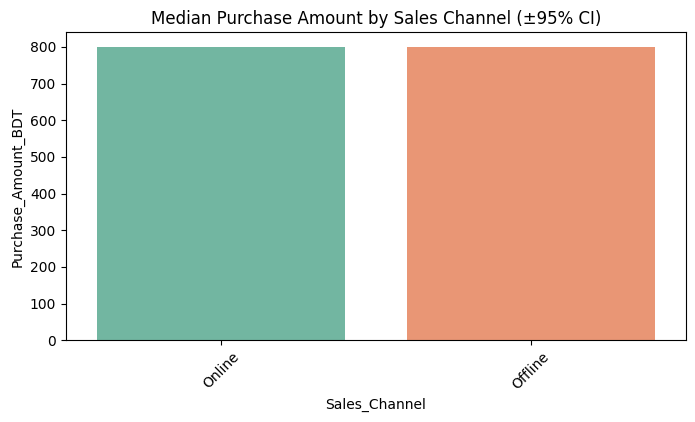

In [7]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x='Sales_Channel',
    y='Purchase_Amount_BDT',
    data=df,
    palette="Set2",
    estimator=np.median,  # or np.mean
    errorbar=('ci', 95)  # Confidence intervals
)
plt.title("Median Purchase Amount by Sales Channel (±95% CI)")
plt.xticks(rotation=45)
plt.show()

In [8]:
summary_stats = df.groupby('Region')['Purchase_Amount_BDT'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Barisal,1207.0,798.441881,20.100865,500.0,800.0,800.0,800.0,800.0
Chattogram,1251.0,797.597682,25.228741,500.0,800.0,800.0,800.0,800.0
Dhaka,1229.0,797.992620,23.447423,500.0,800.0,800.0,800.0,800.0
Khulna,1263.0,796.676184,30.317065,500.0,800.0,800.0,800.0,800.0
Mymensingh,1283.0,796.899260,28.895518,500.0,800.0,800.0,800.0,800.0
Rajshahi,1187.0,797.707178,22.443873,500.0,800.0,800.0,800.0,800.0
Rangpur,1294.0,796.526499,31.037132,500.0,800.0,800.0,800.0,800.0
Sylhet,1286.0,798.585731,19.706901,500.0,800.0,800.0,800.0,800.0


<ipython-input-9-083b0dd0bad2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


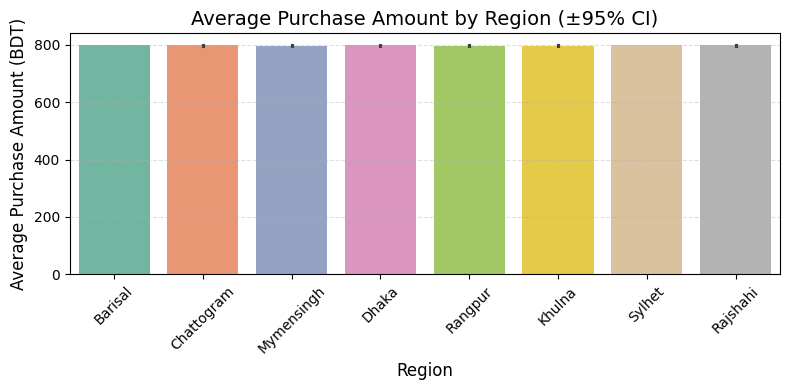

In [9]:
#To view with bar plot
plt.figure(figsize=(8, 4))
sns.barplot(
    x='Region',
    y='Purchase_Amount_BDT',
    data=df,
    palette="Set2",
    estimator=np.mean,  # Default (or use `np.median`)
    errorbar=('ci', 95)  # 95% confidence intervals (or use 'sd' for std deviation)
)
plt.title('Average Purchase Amount by Region (±95% CI)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Purchase Amount (BDT)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)  # Optional grid
plt.tight_layout()
plt.show()

In [10]:
summary_stats = df.groupby('Gender')['Purchase_Amount_BDT'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,4477.0,797.493536,26.055233,500.0,800.0,800.0,800.0,800.0
Male,5523.0,797.584130,25.165842,500.0,800.0,800.0,800.0,800.0


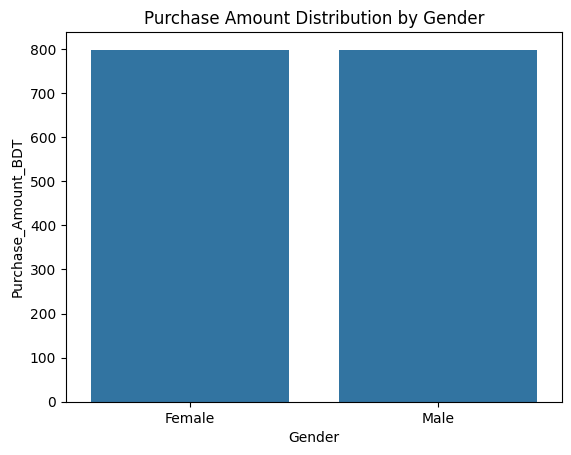

In [11]:
sns.barplot(x='Gender', y='Purchase_Amount_BDT', data=df)
plt.title('Purchase Amount Distribution by Gender')
plt.show()

# Hypothesis Test


##Test-1: Online Vs Offline
Do online and offline sales differ?
- **Hypothesis :**
      - H0: Mean purchase amounts are equal
      - H1: Mean purchase amounts differ
Test used:
Independent two sample t-test

In [12]:
from scipy import stats

online_sales = df[df['Sales_Channel'] == 'Online']['Purchase_Amount_BDT']
offline_sales = df[df['Sales_Channel'] == 'Offline']['Purchase_Amount_BDT']

t_stat,p_val = stats.ttest_ind(online_sales, offline_sales)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: Significant difference exists.")
else:
    print("Fail to reject null hypothesis: No significant difference.")

T-statistic: -1.022, P-value: 0.3067
Fail to reject null hypothesis: No significant difference.


##Test-2: Dhaka Vs Other region
Does Dhaka region and other region sales differ?
- **Hypothesis :**
      - H0: Mean purchase amounts are equal
      - H1: Mean purchase amounts differ
Test used:
Independent two sample t-test

In [13]:
dhaka_sales = df[df['Region']=='Dhaka']['Purchase_Amount_BDT']
other_region_sales = df[df['Region']!='Dhaka']['Purchase_Amount_BDT']

t_stat,p_val = stats.ttest_ind(dhaka_sales, other_region_sales)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

if p_val < alpha:
    print("Reject null hypothesis: Significant difference exists.")
else:
    print("Fail to reject null hypothesis: No significant difference.")


T-statistic: 0.657, P-value: 0.5109
Fail to reject null hypothesis: No significant difference.


##Test-3: Age and purchase amount correlation
correlation is used to measure the linear relationship between two numeric variables, here we can see that age and purchage amount are numeric

In [14]:
corr_coeff, corr_p = stats.pearsonr(df['Age'],df['Purchase_Amount_BDT'])
corr_coeff,corr_p

(np.float64(-0.010160816319134687), np.float64(0.3096385113570186))

Hence corr_coeff value is (-0.0316), there is no significant correlation  between age and purchage amount



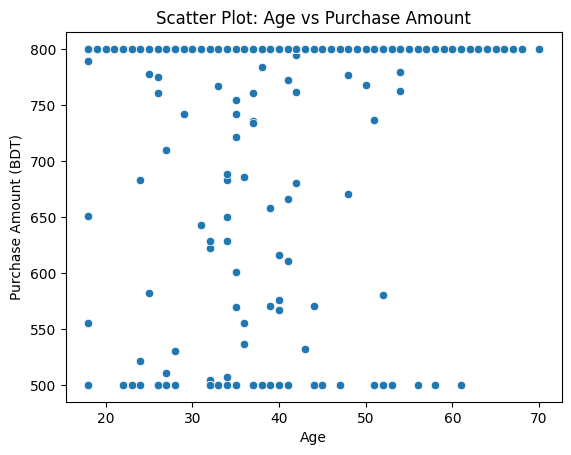

In [15]:
#scatter plot: age vs purchage amount
sns.scatterplot(x='Age', y='Purchase_Amount_BDT', data=df)
plt.title('Scatter Plot: Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (BDT)')
plt.show()

##Test-4: ANOVA by Region
- H0 : The mean purchage amount is the same across all regions
- H1 : At least one regions mean purchage amount is different

ANOVA is used to compare means across three or more groups to determine if at least one group is statistically different. It’s ideal for scenarios where you need to test the impact of categorical variables on a continuous outcome

In [17]:
anova_region = stats.f_oneway(*[df[df['Region'] == region]['Purchase_Amount_BDT'] for region in df['Region'].unique()])
anova_region

F_onewayResult(statistic=np.float64(1.1968259792240863), pvalue=np.float64(0.3005785081268236))

##Test-4: ANOVA by Product Category

In [18]:
anova_category  = stats.f_oneway(*[df[df['Region'] == c]['Purchase_Amount_BDT'] for c in df['Region'].unique()])
anova_category

F_onewayResult(statistic=np.float64(1.1968259792240863), pvalue=np.float64(0.3005785081268236))

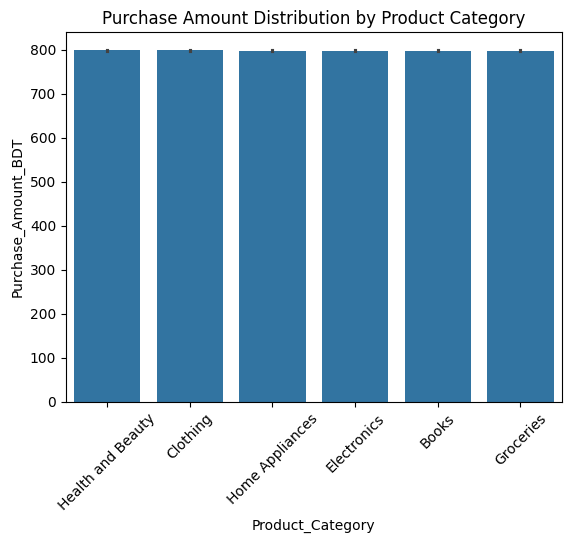

In [20]:
# purchage amount and product category boxplot
sns.barplot(x='Product_Category', y='Purchase_Amount_BDT', data=df)
plt.title('Purchase Amount Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()